In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


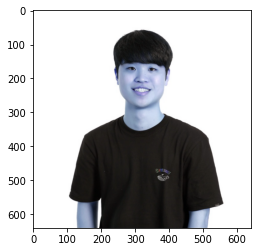

In [169]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

matplotlib, dlib 등의 이미지는 RGB 순으로 사용하는데, opencv는 예외적으로 BGR을 사용

그래서 원본 사진에서 붉은색->푸른색, 푸른색->붉은색

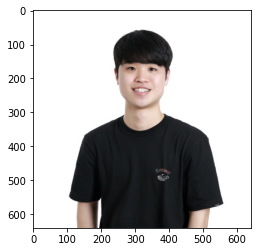

In [170]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [171]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [172]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(253, 139) (382, 268)]]


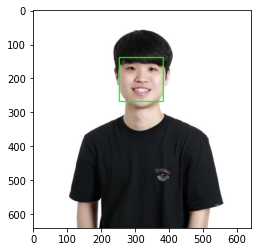

In [173]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
dlib_rects

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [174]:
import os
model_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [194]:
list_landmarks = []
points_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    points_landmarks.append(points)

print(points_landmarks[0].parts())
print('\n')
for i in points_landmarks:
  print(i.parts())
print('\n')
print(list_landmarks)
print(len(list_landmarks[0]))

points[(248, 176), (249, 193), (251, 211), (254, 228), (260, 246), (271, 260), (285, 271), (301, 280), (319, 284), (337, 280), (353, 272), (368, 261), (378, 247), (384, 231), (387, 214), (390, 196), (392, 180), (260, 163), (269, 154), (282, 152), (296, 153), (308, 158), (334, 158), (346, 154), (359, 154), (370, 158), (378, 167), (320, 171), (320, 182), (320, 193), (320, 204), (305, 211), (312, 213), (320, 215), (327, 214), (334, 213), (277, 173), (285, 169), (294, 169), (301, 175), (293, 176), (284, 175), (339, 176), (346, 171), (354, 172), (361, 177), (355, 178), (346, 178), (290, 231), (301, 226), (313, 223), (320, 225), (327, 224), (337, 228), (348, 234), (337, 246), (326, 251), (318, 251), (311, 250), (300, 245), (294, 232), (312, 229), (319, 230), (327, 229), (344, 235), (326, 242), (319, 243), (311, 241)]


points[(248, 176), (249, 193), (251, 211), (254, 228), (260, 246), (271, 260), (285, 271), (301, 280), (319, 284), (337, 280), (353, 272), (368, 261), (378, 247), (384, 231), 

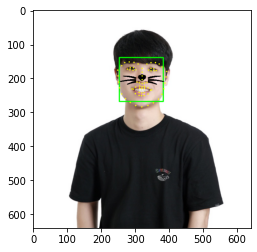

In [195]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [177]:
w, h = 0, 0
x, y = 0, 0

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(320, 204)
(x,y) : (320,204)
(w,h) : (130,130)


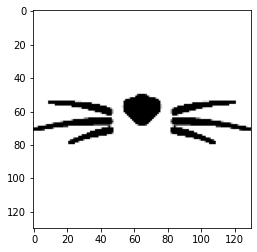

In [178]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/aiffel/explorations/03_camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)

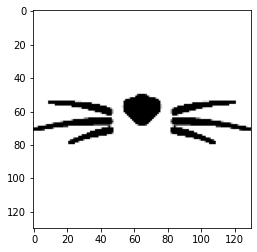

(130, 130, 3)


In [179]:
plt.imshow(img_sticker_rgb)
plt.show()
print (img_sticker.shape)

In [180]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (255,139)


In [181]:
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:]
  print (img_sticker.shape)
  refined_y = 0
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [182]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker==255).astype(np.uint8)

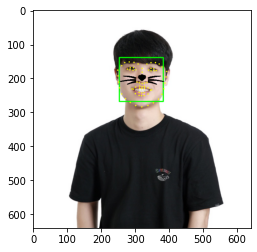

In [183]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

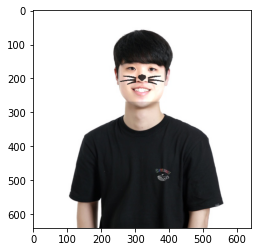

In [186]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:+refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker==255).astype(np.uint8), 0.7, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()